### Description
This Notebook shows how to train and use the library for music genre classification.

### Download data
For this part you will need to have kaggle installed. `pip install kaggle`.
Alternativaly you could download the dataset from `https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification` and manually extract it into `../data/gtzan-dataset-music-genre-classification`

In [15]:
import os
import subprocess

dataset_path = "data/gtzan-dataset-music-genre-classification"

if not os.path.exists(dataset_path):
    print("Dataset not found. Downloading...")
    os.makedirs(dataset_path, exist_ok=True)
    subprocess.run(["kaggle", "datasets", "download", "-d", "andradaolteanu/gtzan-dataset-music-genre-classification", "-p", dataset_path, "--unzip"])
    print("Download complete.")
else:
    print("Dataset already exists.")

Dataset already exists.


### Data format
We first have to create a dataframe which stores all the data (file paths and labels)

In [16]:
import pandas as pd

In [17]:
genres_path = os.path.join(dataset_path, "Data/genres_original")
paths = []
labels = []
for genre in os.listdir(genres_path):
    folder_path = os.path.join(genres_path, genre)
    for filename in os.listdir(folder_path):
        paths.append(os.path.join(folder_path, filename))
        labels.append(genre)
df = pd.DataFrame({"file_path": paths, "label": labels})
df = df[df["file_path"] != "data/gtzan-dataset-music-genre-classification\Data/genres_original\jazz\jazz.00054.wav"] # remove corrupted file
df.sample(5)

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kdens\AppData\Local\Temp\ipykernel_18440\2392687404.py:10: SyntaxWarning: invalid escape sequence '\D'
  df = df[df["file_path"] != "data/gtzan-dataset-music-genre-classification\Data/genres_original\jazz\jazz.00054.wav"] # remove corrupted file


,file_path,label
321,data/gtzan-dataset-music-genre-classification\...,disco
834,data/gtzan-dataset-music-genre-classification\...,reggae
717,data/gtzan-dataset-music-genre-classification\...,pop
109,data/gtzan-dataset-music-genre-classification\...,classical
318,data/gtzan-dataset-music-genre-classification\...,disco


### Model training

In [18]:
from auto_audio.auto_audio_model import AutoAudioModel
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
model = AutoAudioModel()
model.fit(df_train, time_limit=600)

Preprocessing audio files.
Finished preprocessing files.
Cuda not available. Not training transformer model.
Training SVM
SVM achieved 33.125% accuracy.
Training KNN
KNN achieved 38.75% accuracy.
Training Gradient Boosting
Gradient Boosting achieved 59.375% accuracy.
Finished training.
Best model is: Gradient Boosting


Model Accuracy: 0.62


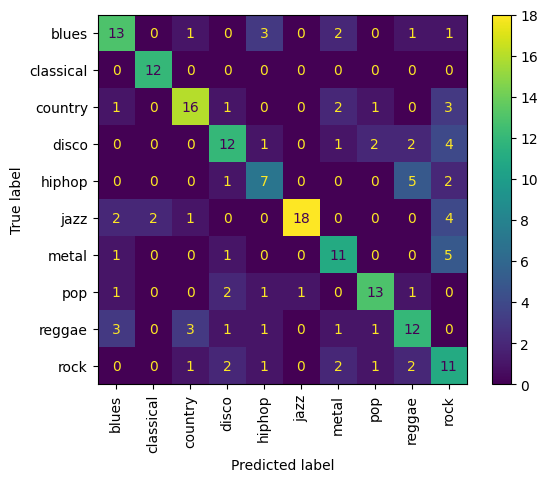

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

y_test = df_test["label"]
y_pred = model.predict(df_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.xticks(rotation=90)
plt.show()